In [1]:
import torch
import torch.nn as nn
import numpy as np
import os

In [2]:
obj_path = 'sampleSTAR.obj'

In [3]:
obj_path = 'sampleSTAR.obj'
objFile = open(obj_path, 'r')
finalTexture = open('finalTexture.txt', 'w')
finalVertex = open('finalVertex.txt', 'w')


vList = []
vtList = []
vnList = []
fList__ = []
fList = []  

for line in objFile:
    split = line.split()
    #if blank line, skip
    if not len(split):
        continue
    if split[0] == "v":
        float_lst = list(np.array(split[1:], dtype = 'float'))
        vList.append(float_lst)
    elif split[0] == "vt":
        float_lst = list(np.array(split[1:], dtype = 'float'))
        vtList.append(float_lst)
    elif split[0] == "vn":
        float_lst = list(np.array(split[1:], dtype = 'float'))
        vnList.append(float_lst)
    elif split[0] == "f":
        fList__.append(split[1:])
        new = []
        for value in split[1:]:
            each = value.split('/')
            int_lst = list(np.array(each, dtype='int'))
            new.append(int_lst)
        fList.append(new)
                
vList_ = torch.as_tensor(vList)
vtList_ = torch.as_tensor(vtList)
vnList_ = torch.as_tensor(vnList)
fList_ = torch.as_tensor(fList)

print('v')
print(vList_.shape)
print(vList_, '\n')

print('vt')
print(vtList_.shape)
print(vtList_, '\n')

print('vn')
print(vnList_.shape)
print(vnList_, '\n')

print('f : v, vt, vn')
print(fList_.shape)
print(fList_)

v
torch.Size([6890, 3])
tensor([[ 0.1163,  4.5813,  0.2896],
        [ 0.1475,  4.5655,  0.2643],
        [ 0.1323,  4.6189,  0.2599],
        ...,
        [-0.2261,  4.4228,  0.0081],
        [-0.2278,  4.4263,  0.0142],
        [-0.2349,  4.4214,  0.0219]], dtype=torch.float64) 

vt
torch.Size([7576, 2])
tensor([[0.3595, 0.8661],
        [0.3792, 0.8631],
        [0.3716, 0.8811],
        ...,
        [0.0117, 0.2181],
        [0.0111, 0.3257],
        [0.0160, 0.3907]], dtype=torch.float64) 

vn
torch.Size([13770, 3])
tensor([[ 0.6820,  0.2522,  0.6865],
        [ 0.7535,  0.2655,  0.6014],
        [ 0.6896,  0.3623,  0.6271],
        ...,
        [-0.0208,  0.2644,  0.9642],
        [-0.0169,  0.3298,  0.9439],
        [-0.0142,  0.3266,  0.9451]], dtype=torch.float64) 

f : v, vt, vn
torch.Size([13776, 3, 3])
tensor([[[    1,     1,     1],
         [    2,     2,     1],
         [    3,     3,     1]],

        [[    3,     3,     2],
         [    2,     2,     2],
         [  

In [4]:
print(len(fList))

13776


In [5]:
foot_f = []
foot_v = []

for i in range (len(fList)):
    # triangle의 모든 y좌표가 1보다 작음 
    if(vList[fList[i][0][0]-1][1]<0.7 and vList[fList[i][1][0]-1][1]<0.7 and vList[fList[i][2][0]-1][1]<0.7):
        foot_f.append(fList[i])
        
print(len(foot_f))
print(foot_f)
    

1390
[[[1075, 1076, 1222], [1076, 1077, 1222], [1077, 1078, 1222]], [[1077, 1078, 1223], [1076, 1077, 1223], [1078, 1079, 1223]], [[1105, 1106, 1240], [1106, 1107, 1240], [1107, 1108, 1240]], [[1107, 1108, 1241], [1106, 1107, 1241], [1108, 1109, 1241]], [[1109, 1110, 1242], [1110, 1111, 1242], [1111, 1112, 1242]], [[1111, 1112, 1243], [1110, 1111, 1243], [1112, 1113, 1243]], [[1113, 1114, 1244], [1114, 1115, 1244], [1115, 1116, 1244]], [[1115, 1116, 1245], [1114, 1115, 1245], [1116, 1117, 1245]], [[1117, 1118, 1246], [1118, 1119, 1246], [1119, 1120, 1246]], [[1119, 1120, 1247], [1118, 1119, 1247], [1076, 1077, 1247]], [[1119, 1120, 1248], [1120, 1121, 1248], [1121, 1122, 1248]], [[1121, 1122, 1249], [1120, 1121, 1249], [1122, 1123, 1249]], [[1107, 1108, 1250], [1123, 1124, 1250], [1105, 1106, 1250]], [[1105, 1106, 1251], [1123, 1124, 1251], [1124, 1125, 1251]], [[1125, 1126, 1252], [1126, 1127, 1252], [1127, 1128, 1252]], [[1127, 1128, 1253], [1126, 1127, 1253], [1128, 1129, 1253]], [[

In [6]:
old_max_z = -5
index_max_z = 0

#발끝 찾기 , 그때 인덱스 찾기 
# , vList[foot_f[i][1][0]-1][2], vList[foot_f[i][2][0]-1][2] 

for i in range(len(foot_f)):
    new_max_z = max(old_max_z, vList[foot_f[i][0][0]-1][2] )
    if(new_max_z != old_max_z):
        index_max_z = i
    old_max_z = new_max_z
print(old_max_z)
print(index_max_z)

#max_z일때 x값 y값 찾기, 그때 z 제대로 나오나 확인 
x_max_z = vList[foot_f[index_max_z][0][0]-1][0]
y_max_z = vList[foot_f[index_max_z][0][0]-1][1]
zzz = vList[foot_f[index_max_z][0][0]-1][2]

print(x_max_z)
print(y_max_z)
print(zzz)

0.486755
118
0.226029
-0.121893
0.486755


In [7]:
foot_f_2 = []
for i in range(len(foot_f)):
    check_v_x = vList[foot_f[i][0][0]-1][0]
    check_v_y = vList[foot_f[i][0][0]-1][1]
    check_v_z = vList[foot_f[i][0][0]-1][2]
    check_vn = vnList[foot_f[i][0][2]-1]
    if (((check_v_y > y_max_z) and (check_vn[1]>0)) or ((check_v_y < y_max_z)and (check_vn[1]<0)) ):
        foot_f_2.append(foot_f[i])
    
print(len(foot_f))
print(len(foot_f_2))
    

1390
859


In [8]:
x_=[]
y_=[]
z_=[]
new_v = []
for i in range(len(foot_f_2)):
    new_v.append(vList[foot_f_2[i][0][0]-1])
    new_v.append(vList[foot_f_2[i][1][0]-1])
    new_v.append(vList[foot_f_2[i][2][0]-1])

    
print(new_v)

[[0.189497, 0.263877, -0.073553], [0.191376, 0.183103, -0.062998], [0.208889, 0.256907, -0.029448], [0.208889, 0.256907, -0.029448], [0.191376, 0.183103, -0.062998], [0.204276, 0.178725, -0.015626], [0.175372, 0.105449, -0.047819], [0.191376, 0.183103, -0.062998], [0.189764, 0.105064, -0.095129], [0.189764, 0.105064, -0.095129], [0.191376, 0.183103, -0.062998], [0.192797, 0.185862, -0.106148], [0.232814, 0.113273, -0.201426], [0.209875, 0.19095, -0.172008], [0.2375, 0.196435, -0.201382], [0.359751, 0.113047, -0.124812], [0.337488, 0.194793, -0.1566], [0.358445, 0.193217, -0.125155], [0.359751, 0.113047, -0.124812], [0.358445, 0.193217, -0.125155], [0.362473, 0.115017, -0.073503], [0.343224, 0.111591, -0.006254], [0.362473, 0.115017, -0.073503], [0.345218, 0.184168, -0.015846], [0.191611, 0.104923, 0.004671], [0.204276, 0.178725, -0.015626], [0.175372, 0.105449, -0.047819], [0.175372, 0.105449, -0.047819], [0.204276, 0.178725, -0.015626], [0.191376, 0.183103, -0.062998], [0.232814, 0.11

In [9]:
for i in range(len(new_v)):
    if (new_v[i][1].item()<1 ) :
        x_.append(new_v[i][0].item())
        y_.append(new_v[i][1].item())
        z_.append(new_v[i][2].item())

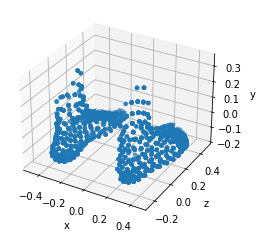

In [10]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_, z_, y_, cmap='viridis', linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y');

In [11]:
x_max = max(x_)
y_max = max(y_)
z_max = max(z_)
print(x_max)
print(y_max)
print(z_max)

'''z가 max 일때의 f index를 찾고, 그때의 y_end 값을 찾음. 
y > y_end 일때(발등) normal y <0 이면(아래를 향하면)버림
y < y_end면 전부 다 발 '''
'''그다음 x y z 의 max min 전부 찾아서 차 구함. '''


0.459841
0.339361
0.486755


'그다음 x y z 의 max min 전부 찾아서 차 구함. '

In [12]:
foot_f_3 = []
for i in range(len(foot_f)):
    check_v_x = vList[foot_f[i][0][0]-1][0]
    check_v_y = vList[foot_f[i][0][0]-1][1]
    check_v_z = vList[foot_f[i][0][0]-1][2]
    check_vn = vnList[foot_f[i][0][2]-1]
    if (((check_v_y > y_max_z) and (check_vn[1]>0)) or ((check_v_y < y_max_z)and (check_vn[1]<0)) ):
        if (check_v_x > x_max_z) or ((check_v_x < x_max_z) and (check_vn[0]<0) and ((x_max_z - check_v_x)<0.3)) :
            foot_f_3.append(foot_f[i])
    
print(len(foot_f))
print(len(foot_f_3)) 

1390
423


In [13]:
x_=[]
y_=[]
z_=[]
new_v = []
for i in range(len(foot_f_3)):
    new_v.append(vList[foot_f_3[i][0][0]-1])
    new_v.append(vList[foot_f_3[i][1][0]-1])
    new_v.append(vList[foot_f_3[i][2][0]-1])

    
print(new_v)

[[0.189497, 0.263877, -0.073553], [0.191376, 0.183103, -0.062998], [0.208889, 0.256907, -0.029448], [0.208889, 0.256907, -0.029448], [0.191376, 0.183103, -0.062998], [0.204276, 0.178725, -0.015626], [0.175372, 0.105449, -0.047819], [0.191376, 0.183103, -0.062998], [0.189764, 0.105064, -0.095129], [0.189764, 0.105064, -0.095129], [0.191376, 0.183103, -0.062998], [0.192797, 0.185862, -0.106148], [0.232814, 0.113273, -0.201426], [0.209875, 0.19095, -0.172008], [0.2375, 0.196435, -0.201382], [0.359751, 0.113047, -0.124812], [0.337488, 0.194793, -0.1566], [0.358445, 0.193217, -0.125155], [0.359751, 0.113047, -0.124812], [0.358445, 0.193217, -0.125155], [0.362473, 0.115017, -0.073503], [0.343224, 0.111591, -0.006254], [0.362473, 0.115017, -0.073503], [0.345218, 0.184168, -0.015846], [0.191611, 0.104923, 0.004671], [0.204276, 0.178725, -0.015626], [0.175372, 0.105449, -0.047819], [0.175372, 0.105449, -0.047819], [0.204276, 0.178725, -0.015626], [0.191376, 0.183103, -0.062998], [0.232814, 0.11

In [14]:
for i in range(len(new_v)):
    if (new_v[i][1].item()<1 ) :
        x_.append(new_v[i][0].item())
        y_.append(new_v[i][1].item())
        z_.append(new_v[i][2].item())

NameError: name 'x_' is not defined

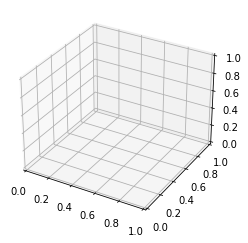

In [1]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_, z_, y_, cmap='viridis', linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y');